In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

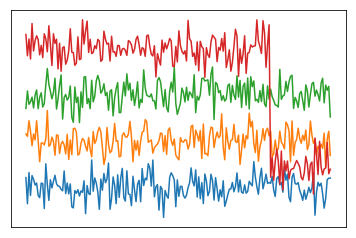

In [2]:
X = np.random.normal(0, 1, size=(200, 4))
for i in range(4):
    X[:, i] += 4 * (i+1)
X[160:, 3] -= 10
plt.figure()
plt.plot(X)
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
df = pd.read_csv("../data/Davis.csv", index_col='Unnamed: 0')
# 訓練データとテストデータに分割
df = df.drop(['sex', 'repwt', 'repht'], axis=1)
df.head()

,weight,height
1,77,182
2,58,161
3,53,161
4,68,177
5,59,157


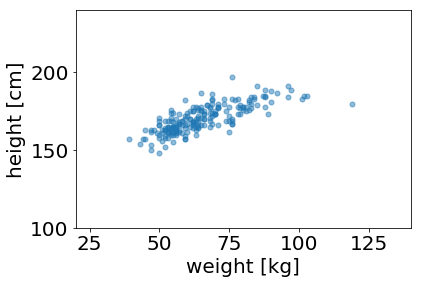

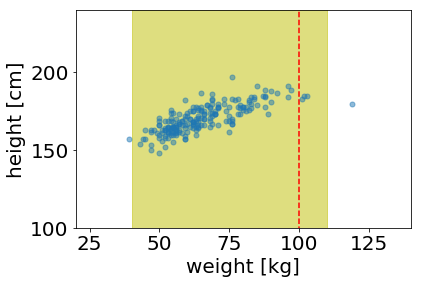

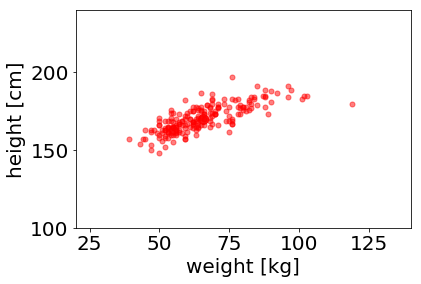

In [42]:
plt.rcParams.update({'font.size': 20})

plt.figure()
plt.xlabel("weight [kg]")
plt.ylabel("height [cm]")
plt.xlim([20, 140])
plt.ylim([100, 240])
plt.plot(df.weight, df.height, 'o', alpha=.5, ms=5)
# plt.plot(*df.mean(), '*', color='r', ms=10, alpha=.9)
plt.show()

plt.figure()
plt.xlabel("weight [kg]")
plt.ylabel("height [cm]")
plt.xlim([20, 140])
plt.ylim([100, 240])
plt.plot(df.weight, df.height, 'o', alpha=.5, ms=5)
plt.vlines(100, 0, 300, color='r', linestyle='dashed', linewidth=1.5)


testx = [110, 110, 40, 40]
testy = [0, 300, 300, 0]
plt.fill(testx,testy,color="y",alpha=0.5)
# plt.plot(*df.mean(), '*', color='r', ms=10, alpha=.9)
plt.show()

plt.figure()
plt.xlabel("weight [kg]")
plt.ylabel("height [cm]")
plt.xlim([20, 140])
plt.ylim([100, 240])
plt.plot(df.weight, df.height, 'ro', alpha=.5, ms=5)
plt.plot(*df.mean(), 'o', color='r', ms=10, alpha=.9)
plt.show()

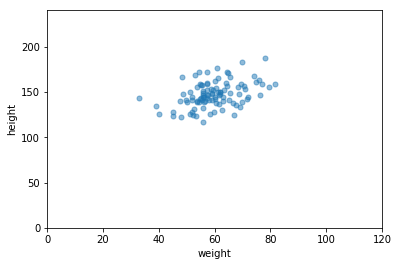

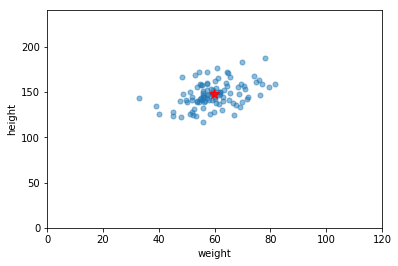

In [5]:
data = np.random.multivariate_normal([60, 150], [[80,50],[50,180]], size=100)

plt.figure()
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim([0, 120])
plt.ylim([0, 240])
plt.plot(data[:, 0], data[:, 1], 'o', alpha=.5, ms=5)
# plt.plot(*np.mean(data, axis=0), '*', color='r', ms=10, alpha=.9)
plt.show()

plt.figure()
plt.xlabel("weight")
plt.ylabel("height")
plt.xlim([0, 120])
plt.ylim([0, 240])
plt.plot(data[:, 0], data[:, 1], 'o', alpha=.5, ms=5)
plt.plot(*np.mean(data, axis=0), '*', color='r', ms=10, alpha=.9)
plt.show()

In [6]:
data.mean()

103.4521055008167

In [7]:
np.mean(data, axis=0)

array([ 59.60962173, 147.29458927])